# THIS IS LEFT:


host_neighbourhood, host_location, neighbourhood, and neighbourhood_cleansed need to be looked into

property_type, room_type is very similar

calculated_host_listings_count	calculated_host_listings_count_entire_homes	calculated_host_listings_count_private_rooms	calculated_host_listings_count_shared_rooms

these are a mess:

minimum_nights	maximum_nights	minimum_minimum_nights	maximum_minimum_nights	
minimum_maximum_nights	maximum_maximum_nights	minimum_nights_avg_ntm	maximum_nights_avg_ntm

and

number_of_reviews	number_of_reviews_ltm	number_of_reviews_l30d	first_review    last_review	review_scores_rating	
review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	
review_scores_communication	review_scores_location	review_scores_value     reviews_per_month


In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", 80)
pd.set_option("display.precision", 2)

In [3]:
# Read in the data
df = pd.read_csv('../original_do_not_change.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220624204326,2022-06-25,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"København, Denmark",I'm currently working as an environmental cons...,within a day,90%,55%,f,https://a0.muscache.com/im/users/16774/profile...,https://a0.muscache.com/im/users/16774/profile...,Nørrebro,1.0,1.0,"['email', 'phone']",t,f,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,55.69,12.55,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Free washer \u2013 In unit"", ""Coffe...",$877.00,3,15,3.0,3.0,15.0,15.0,3.0,15.0,NaN,t,0,0,22,22,2022-06-25,171,3,3,2009-09-04,2022-06-16,4.78,4.78,4.79,4.86,4.89,4.72,4.70,NaN,f,1,1,0,0,1.10
1,26057,https://www.airbnb.com/rooms/26057,20220624204326,2022-06-25,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,https://www.airbnb.com/users/show/109777,Kari,2010-04-17,"København, Denmark","We are a family with 2 children, and living in...",within an hour,100%,38%,f,https://a0.muscache.com/im/users/109777/profil...,https://a0.muscache.com/im/users/109777/profil...,Indre By,1.0,1.0,"['email', 'phone']",t,t,"Copenhagen, Hovedstaden, Denmark",Indre By,NaN,55.69,12.58,Entire home,Entire home/apt,6,NaN,1.5 baths,4.0,4.0,"[""Private fenced garden or backyard"", ""Stove"",...","$2,400.00",4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,0,3,9,224,2022-06-25,58,8,0,2013-12-02,2022-05-15,4.91,4.93,4.96,4.92,4.85,4.94,4.81,NaN,f,1,1,0,0,0.56
2,26473,https://www.airbnb.com/rooms/26473,20220624204326,2022-06-25,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,https://www.airbnb.com/users/show/112210,Julia,2010-04-22,"Copenhagen, Denmark","Active young woman, started as an expat in Cop...",within an hour,100%,94%,f,https://a0.muscache.com/im/pictures/user/8a185...,https://a0.muscache.com/im/pictures/user/8a185...,Indre By,11.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Indre By,NaN,55.68,12.58,Entire townhouse,Entire home/apt,11,NaN,2 baths,5.0,5.0,"[""Essentials"", ""Cooking basics"", ""TV"", ""Stove""...","$3,350.00",3,31,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,3,3,3,3,2022-06-25,293,0,0,2010-10-14,2020-03-02,4.53,4.62,4.44,4.77,4.69,4.88,4.60,NaN,f,11,6,5,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220624204326,2022-06-25,Best Location in C

In [4]:
df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.25e+04,12495,1.25e+04,12495,12495,12156,6461,12495,1.25e+04,12495,12494,12494,12472,6400,9658,9658,10958,12494,12494,12494,5391,12494.00,12494.00,12494,12494,12494,6461,12495,0.0,12495.00,12495.00,12495,12495,12495.00,0.0,12483,12277.00,12330.00,12495,12495,12495.00,12495.00,12494.00,12494.00,12494.00,12494.00,12494.00,12494.00,0.0,12495,12495.00,12495.00,12495.00,12495.00,12495,12495.00,12495.00,12495.00,10191,10191,10191.00,10141.00,10141.00,10141.00,10141.00,10140.00,10141.00,0.0,12495,12495.00,12495.00,12495.00,1.25e+04,10191.00
unique,NaN,12495,NaN,2,12002,11944,6231,12386,NaN,11157,3454,3456,513,5427,4,68,99,2,10973,10973,35,NaN,NaN,7,2,2,203,11,NaN,NaN,NaN,52,4,NaN,NaN,20,NaN,NaN,11914,1783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2607,1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6983,NaN,2022-06-25,Cozy apartment in the heart of Copenhagen,Nyd det simple liv i denne fredelige og centra...,Distance to most popular attractions:<br /><br...,https://a0.muscache.com/pictures/950aadd4-4c99...,NaN,https://www.airbnb.com/users/show/187610263,ApartmentinCopenhagen,2018-05-03,"Copenhagen, Denmark",Vi udlejer møblerede lejligheder og har mere e...,within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Nørrebro,NaN,NaN,"['email', 'phone']",t,t,"Copenhagen, Denmark",Vesterbro-Kongens Enghave,NaN,NaN,NaN,Entire rental unit,Entire home/apt,NaN,NaN,1 bath,NaN,NaN,"[""TV"", ""Paid parking on premises"", ""Wifi"", ""Sm...","$1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,NaN,NaN,2022-06-25,NaN,NaN,NaN,2022-05-29,2022-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,9403,18,22,19,11,NaN,181,181,182,4251,181,4425,7005,3618,11581,187,187,905,NaN,NaN,10318,12307,10467,4733,2044,NaN,NaN,NaN,5931,10982,NaN,NaN,9429,NaN,NaN,23,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12424,NaN,NaN,NaN,NaN,9403,NaN,NaN,NaN,64,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9738,NaN,NaN,NaN,NaN,NaN
mean,1.18e+17,NaN,2.02e+13,NaN,NaN,NaN,NaN,NaN,1.00e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99,7.99,NaN,NaN,NaN,NaN,NaN,NaN,55.68,12.56,NaN,NaN,3.44,NaN,NaN,1.69,2.07,NaN,NaN,4.60,494.46,4.47,5.20,588.87,630.29,4.83,615.28,NaN,NaN,5.73,10.64,16.53,90.92,NaN,18.07,4.48,0.69,NaN,NaN,4.78,4.85,4.70,4.89,4.91,4.83,4.72,NaN,NaN,5.00,4.75,0.24,4.08e-03,0.76
std,2.42e+17,NaN,0.00e+00,NaN,NaN,NaN,NaN,NaN,1.23e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.17,44.17,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.03,NaN,NaN,1.76,NaN,NaN,1.31,1.43,NaN,NaN,17.12,509.22,17.03,18.96,522.12,518.43,18.52,513.7

In [5]:
# Drop columns with all missing values
count = 0
print('Columns with all values missing:')
for col in df.columns: 
    if df[col].count() == 0:
        print(col)
        df.drop(col, axis=1, inplace=True)
        count += 1
print(f'dropped {count} columns, shape is now {df.shape}')

# Drop columns with one value
print('\nColumns with one value:')
count = 0
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 1:
        print(column)
        df.drop(column, axis=1, inplace=True)
        count += 1
print(f'Columns with only one value: {count}, shape is now {df.shape}')

# Drop duplicated columns
identical_columns = []
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            identical_columns.append((df.columns[i], df.columns[j]))
print(f"\nIdentical columns: \n{identical_columns}.")
drop_columns = [col[1] for col in identical_columns]
df.drop(drop_columns, axis=1, inplace=True)
print(f'Dropped {drop_columns}, shape is now {df.shape}')

Columns with missing values:
neighbourhood_group_cleansed
bathrooms
calendar_updated
license
dropped 4 columns, shape is now (12495, 70)

Columns with one value:
scrape_id
Columns with only one value: 1, shape is now (12495, 69)

Identical columns: 
[('last_scraped', 'calendar_last_scraped'), ('host_listings_count', 'host_total_listings_count')].
Dropped ['calendar_last_scraped', 'host_total_listings_count'], shape is now (12495, 67)
Dropped last_scraped as it has low value for analysis, shape is now (12495, 66)

Moved all urls to its own df, shape is now (12495, 61)


In [11]:
df[['host_neighbourhood', 'host_location', 'neighbourhood', 'neighbourhood_cleansed']].describe()
df.drop(['neighbourhood'], axis=1, inplace=True)
print(f"\nDropped neighbourhood as it neighbourhood_cleansed is more accurate, shape is now {df.shape}")

# Host location is the host's origin
# Host neighbourhood is where the host lives
# Neighbourhood and neighbourhood_cleansed is the neighbourhood of the listing

,host_neighbourhood,host_location,neighbourhood,neighbourhood_cleansed
count,5391,12472,6461,12495
unique,35,513,203,11
top,Nørrebro,"Copenhagen, Denmark","Copenhagen, Denmark",Vesterbro-Kongens Enghave
freq,905,4251,4733,2044


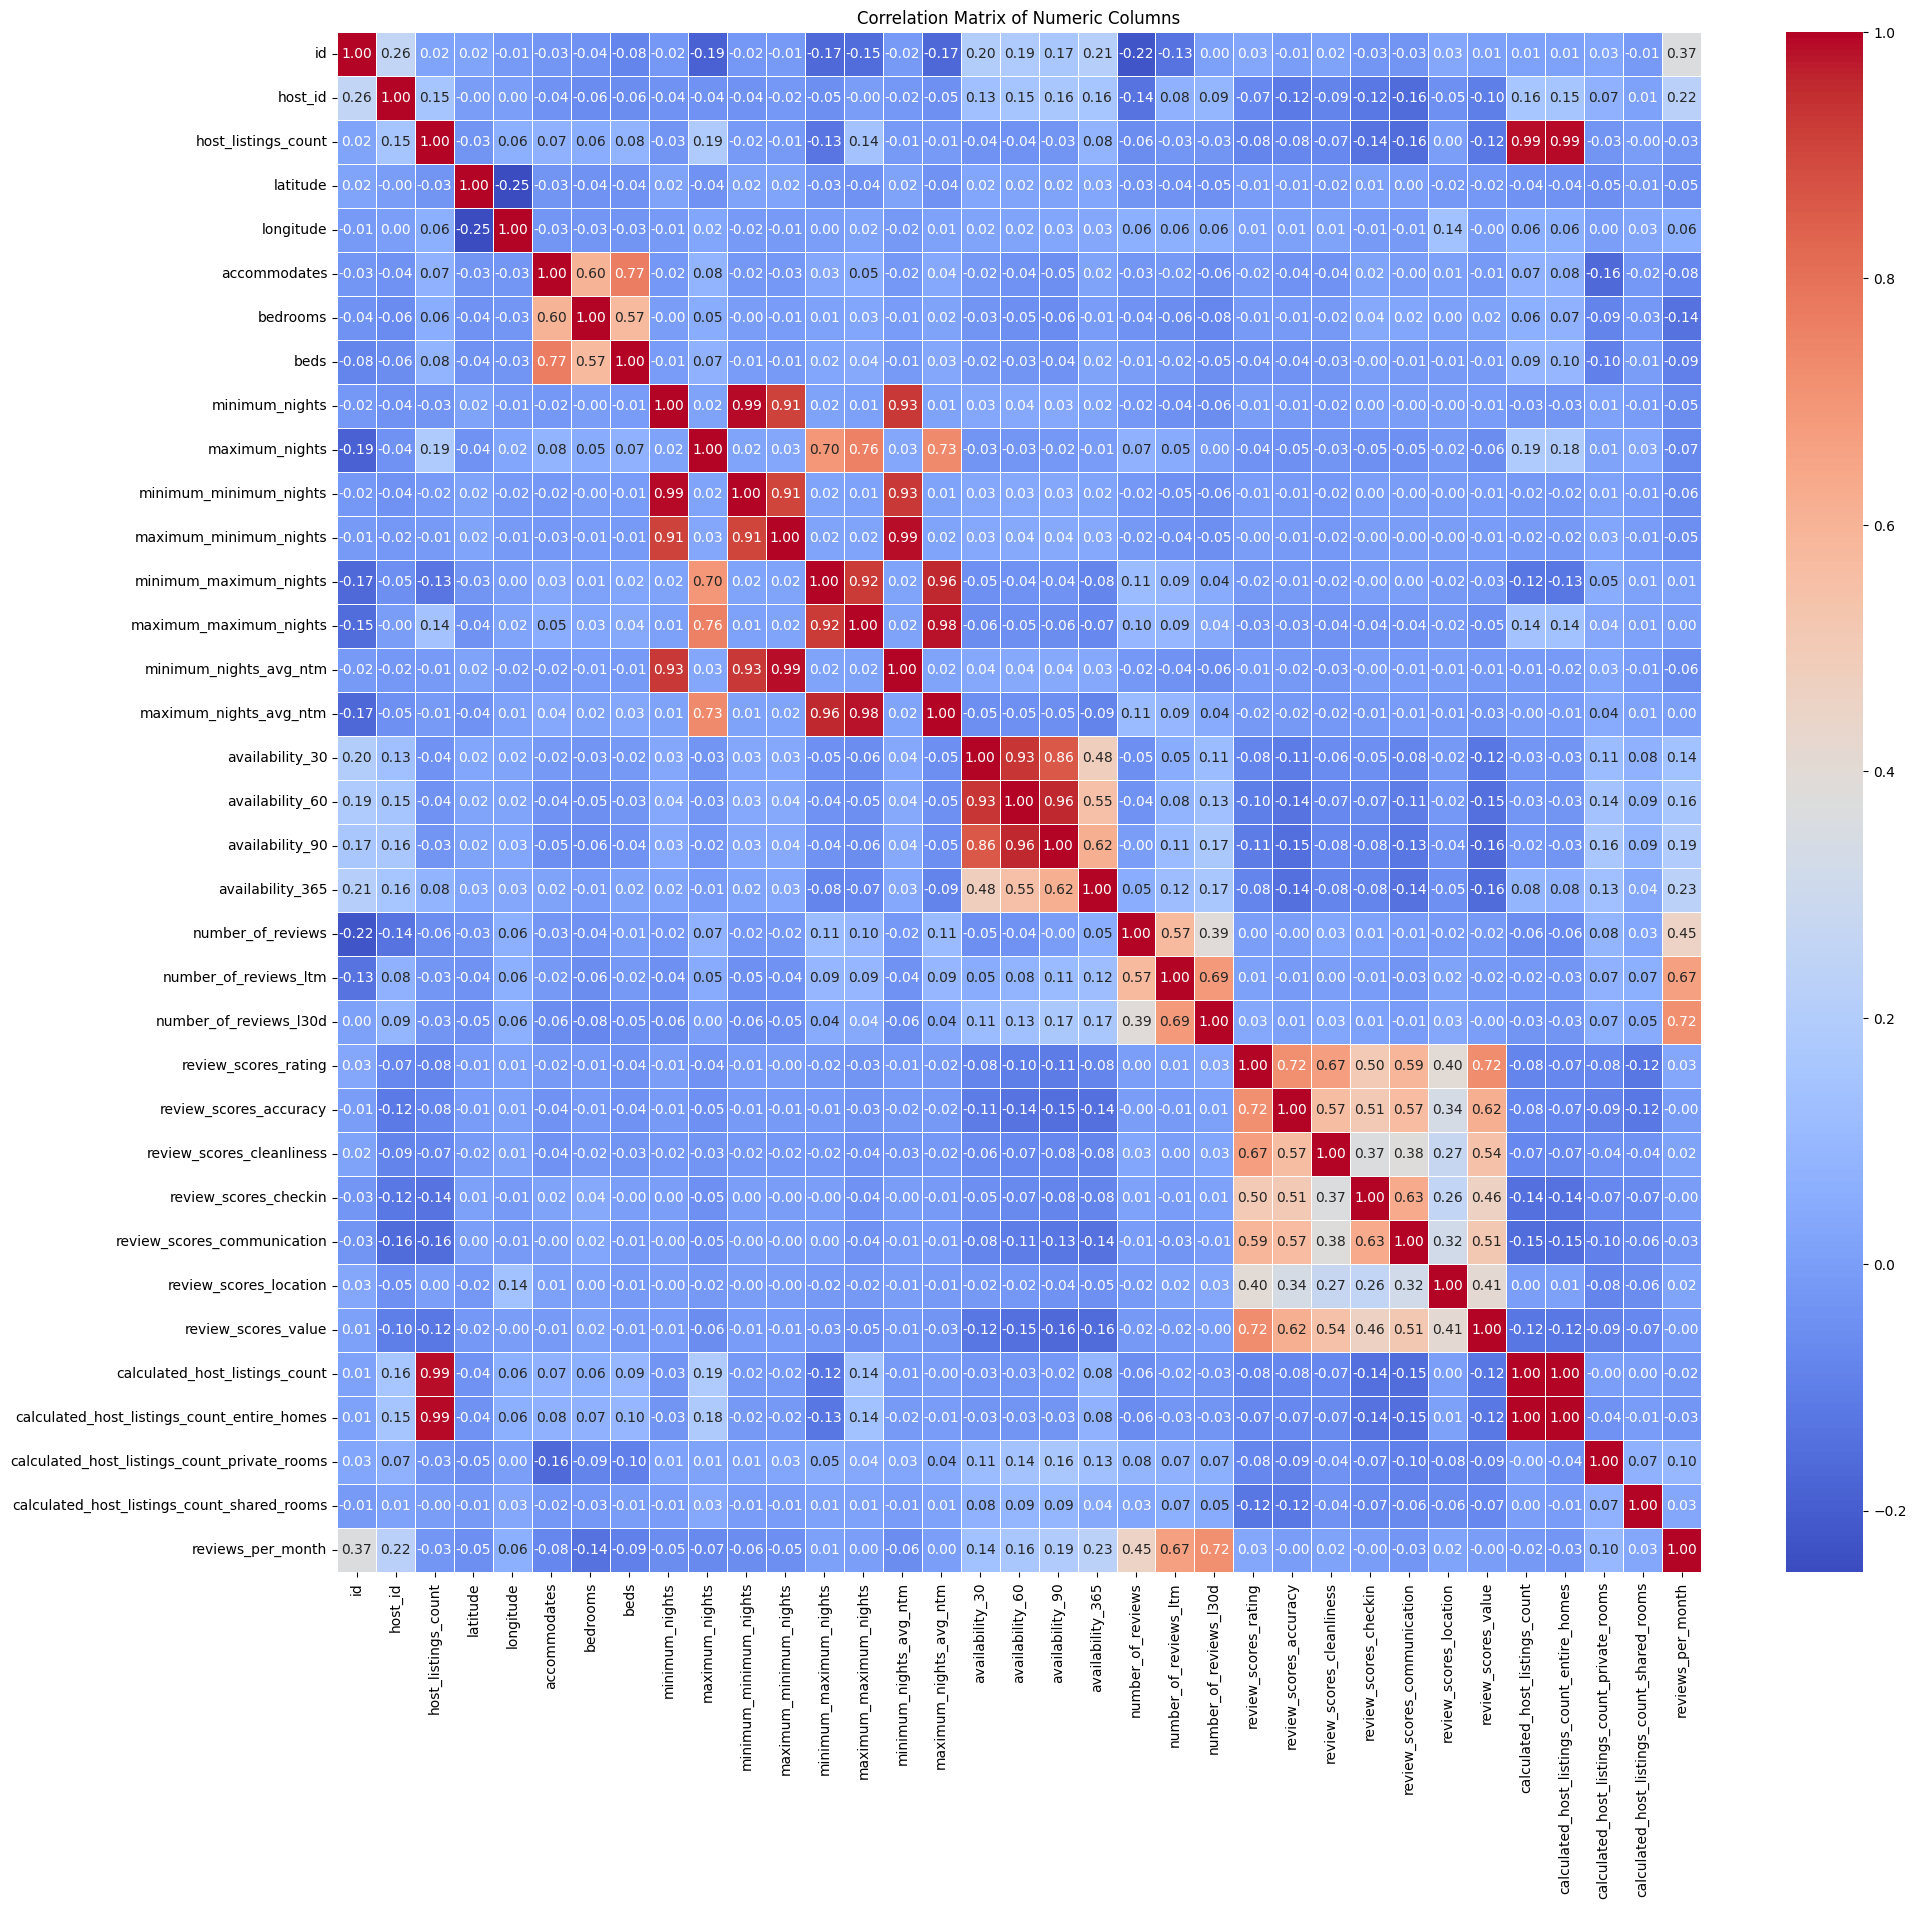

In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


In [7]:
# these are a mess:

# minimum_nights	maximum_nights	minimum_minimum_nights	maximum_minimum_nights	
# minimum_maximum_nights	maximum_maximum_nights	minimum_nights_avg_ntm	maximum_nights_avg_ntm

# and

# number_of_reviews	number_of_reviews_ltm	number_of_reviews_l30d	first_review    last_review	review_scores_rating	
# review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	
# review_scores_communication	review_scores_location	review_scores_value     reviews_per_month

<Axes: >

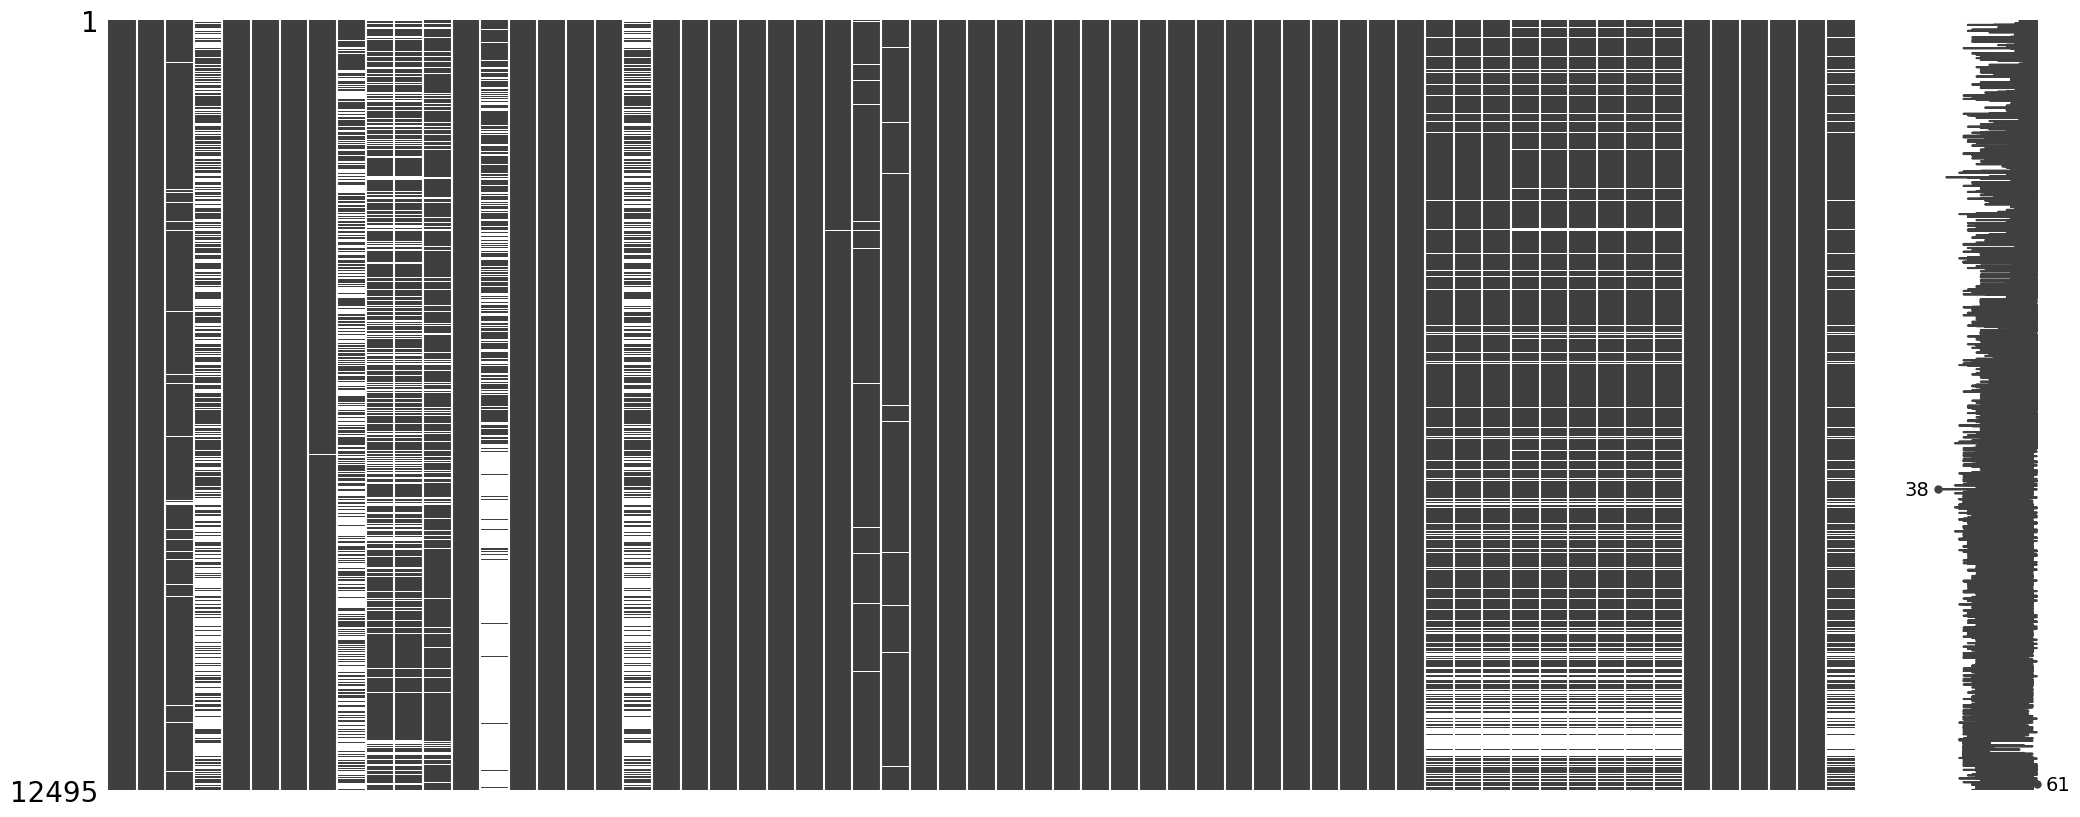

In [12]:
msno.matrix(df)

<Axes: >

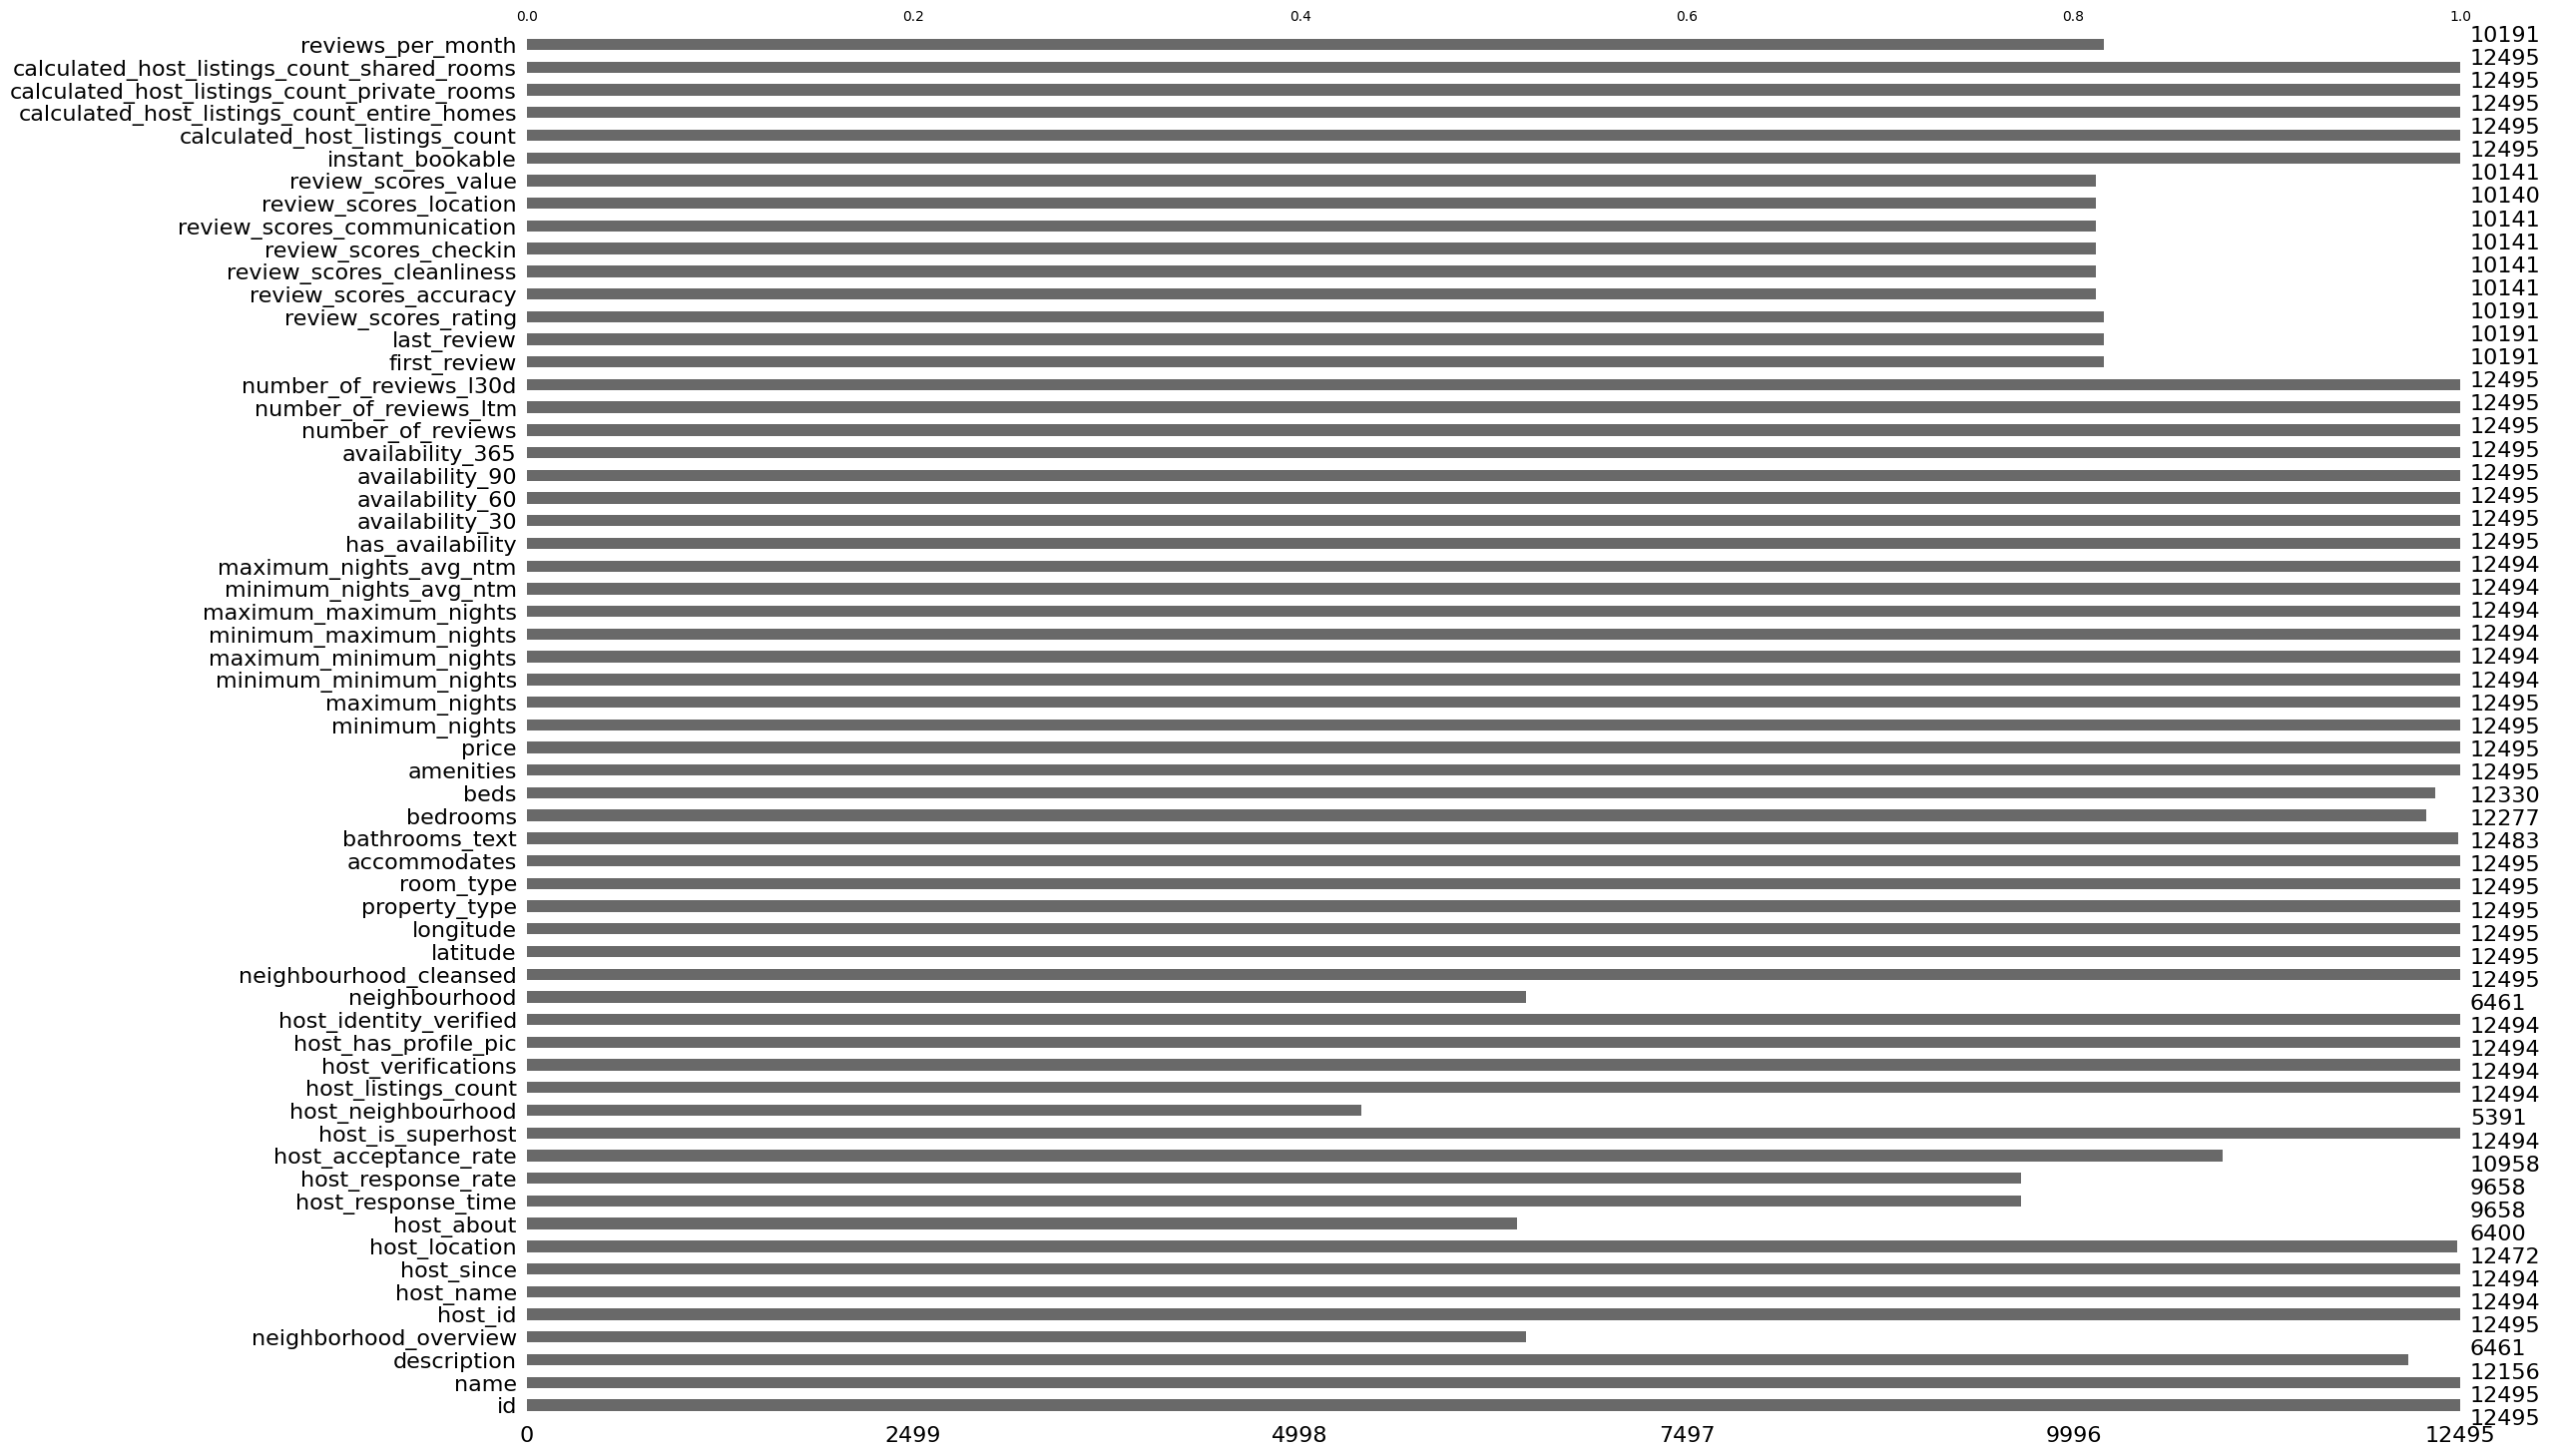

In [13]:
msno.bar(df)

# Maybe devide the data into several parts?

Empty DataFrame
Columns: [id, name, description, neighborhood_overview, host_id, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, insta

In [ ]:
# Drop URls as they are not important for analysis
url = ['listing_url', 'host_url', 'picture_url', 'host_picture_url', 'host_thumbnail_url']
url_df = df[url]
df.drop(url, axis=1, inplace=True)
print(f"\nMoved all urls to it's own df, shape is now {df.shape}")

In [8]:
host_columns = df[['id', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]
listing_info_columns = df[['id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price']]


# Fixing up columns

In [9]:
# fixing price
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# fixing bathrooms_text

# Create new columns